In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Reading the data

mov = pd.read_csv('movies.csv')

In [3]:
mov.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Finding number of null values per each column

mov.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
#Removing the rows with null values 

mov.dropna(axis=0,how='any',inplace=True)

In [6]:
#Finding the dataframe of each column

mov.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Changing datatype of votes, budget, gross, runtime from float to int

mov['votes'] = mov['votes'].astype('int64')

mov['budget'] = mov['budget'].astype('int64')

mov['gross'] = mov['gross'].astype('int64')

mov['runtime'] = mov['runtime'].astype('int64')

In [8]:
mov.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [9]:
mov['year_of_release'] = mov['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

mov.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


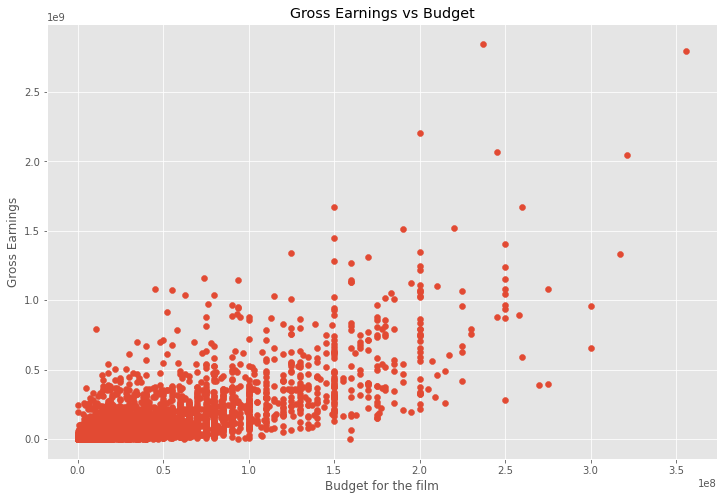

In [10]:
#Scatter plot with gross earnings vs budget

import matplotlib
plt.style.use('ggplot')

plt.scatter(x=mov['budget'], y=mov['gross'])

plt.title('Gross Earnings vs Budget')
plt.xlabel('Budget for the film')
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

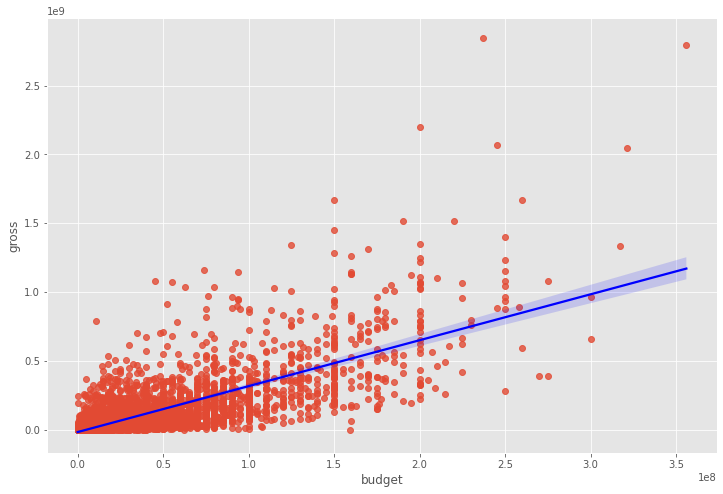

In [11]:
#Regression plot with gross earnings vs budget

sns.regplot(x='budget', y='gross', data=mov, line_kws={'color':'blue'})

In [12]:
#Checking the correlation
#This correlation matrix contains only numerical features

mov.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


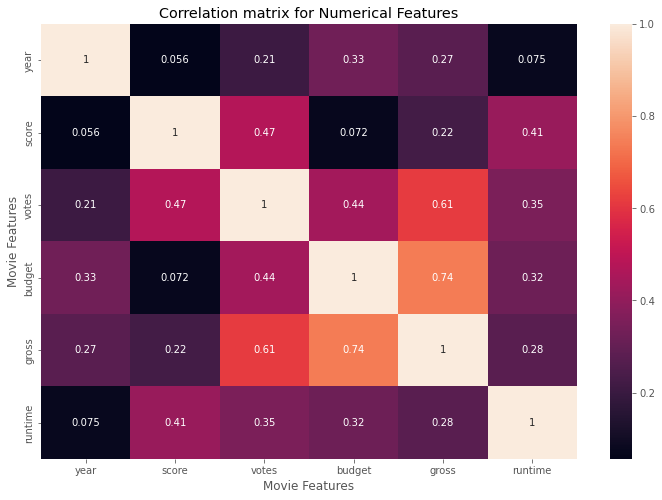

In [13]:
#Visualizing the correlation matrix using heatmap in seaborn

correlation_matrix = mov.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for Numerical Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [14]:
#Categorizing the non-numerical features

mov_numerized = mov

for col_name in mov_numerized.columns:
    if (mov_numerized[col_name].dtype == 'object'):
        mov_numerized[col_name] = mov_numerized[col_name].astype('category')
        mov_numerized[col_name] = mov_numerized[col_name].cat.codes
        
mov_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,0


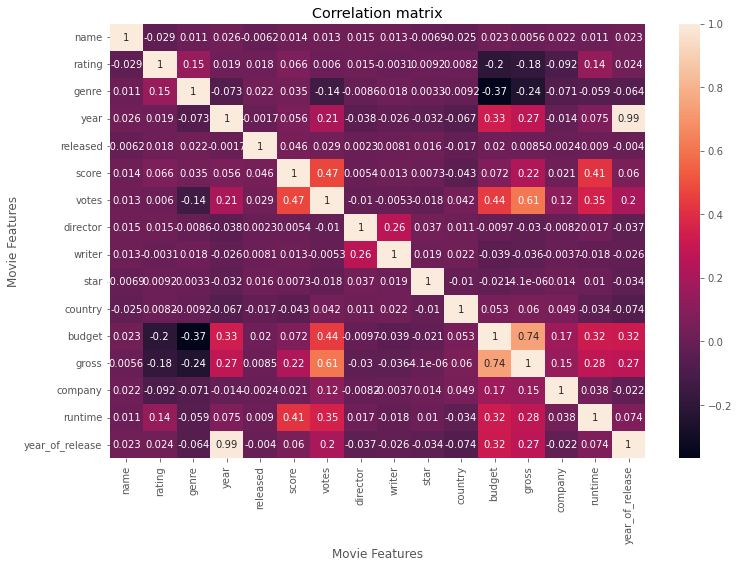

In [15]:
#Visualizing the correlation matrix using heatmap in seaborn (non-numerical features included)

correlation_matrix = mov_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [16]:
mov_numerized.corr().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.023234
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.023925
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.064308
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.990417
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.003994


In [17]:
corr_pairs = mov_numerized.corr().unstack()

corr_pairs

name             name               1.000000
                 rating            -0.029234
                 genre              0.010996
                 year               0.025542
                 released          -0.006152
                                      ...   
year_of_release  budget             0.315686
                 gross              0.265307
                 company           -0.022074
                 runtime            0.073663
                 year_of_release    1.000000
Length: 256, dtype: float64

In [18]:
sorted_pairs = corr_pairs.sort_values(ascending=False)

sorted_pairs

name     name       1.000000
rating   rating     1.000000
runtime  runtime    1.000000
company  company    1.000000
gross    gross      1.000000
                      ...   
budget   rating    -0.203946
genre    gross     -0.244101
gross    genre     -0.244101
budget   genre     -0.368523
genre    budget    -0.368523
Length: 256, dtype: float64

In [19]:
highest_corr = sorted_pairs[sorted_pairs > 0.5]

highest_corr

name             name               1.000000
rating           rating             1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
year_of_release  year_of_release    1.000000
                 year               0.990417
year             year_of_release    0.990417
budget           gross              0.740247
gross            budget             0.740247
                 votes              0.614751
votes            gross              0.614751
dtype: flo